# Data Exploration Notebook

### Objectives:

**Thorough Exploratory Data Analysis (EDA):**
    To study each column thoroughly and their relationships with each other.

### Inputs:

inputs/datasets/raw/udemy_courses.csv

### Outputs:

generate barplots, pie charts, histograms and scatterplot to visualise the data for better understanding.

### 1. Import libraries and get the current directory path

In [12]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

current_dir = os.getcwd()

In [2]:
os.chdir(os.path.dirname(current_dir))
current_dir

'/Users/panda/Desktop/code_institue_projects/portfolio-projects/learning_trends_analyzer/jupyter_notebooks'

In [4]:
current_dir

'/Users/panda/Desktop/code_institue_projects/portfolio-projects/learning_trends_analyzer/jupyter_notebooks'

### 2. Grab five rows from the dataframe

In [5]:
df = pd.read_csv("inputs/datasets/raw/udemy_courses.csv")
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


### 3. Get the statistcal data and dataset's complete information

In [10]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


### 3. Data Preprocessing

Data preprocessing involves cleaning the dataset by handling missing values, removing duplicates and correcting inconsistencies. Here we can see that the time stamp is an object. We convert it into datetime and also look for null values as well as duplicates.

In [19]:
# Convert published_timestamp to datetime
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

In [15]:
# Check for duplicates
print(f"Duplicates: {df.duplicated().sum()}")

Duplicates: 6


In [16]:
# Check for null values
print(f"Null Values: {df.isnull().sum()}")

Null Values: course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64


### 4. Exploratory Data Anaylsis (EDA)

Exploratory Data Analysis (EDA) includes visualising data distributions and identifying correlations to gain insights and guide further analysis.

#### 4.1: Distribution of Courses by Subject

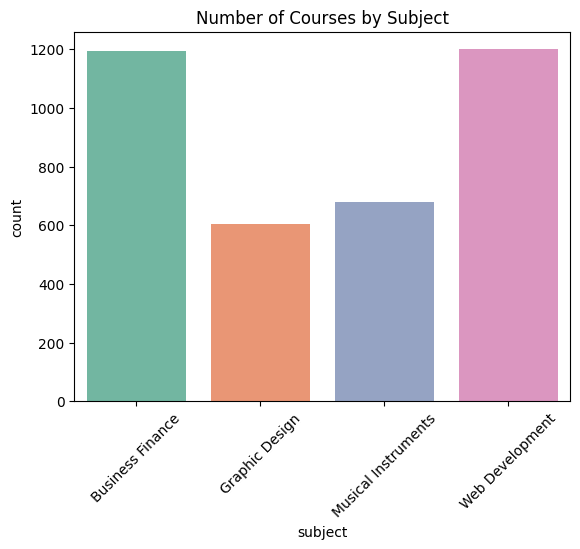

In [21]:
sns.countplot(data=df, x='subject', hue='subject', palette='Set2', legend=False)
plt.title("Number of Courses by Subject")
plt.xticks(rotation=45)
plt.show()

#### 4.2 Paid vs. Free Courses

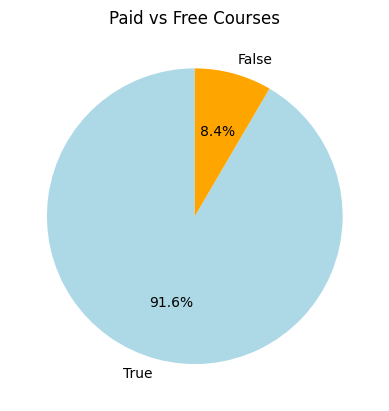

In [25]:
df['is_paid'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'])
plt.title("Paid vs Free Courses")
plt.ylabel('')
plt.show()

#### 4.3 Price Distribution

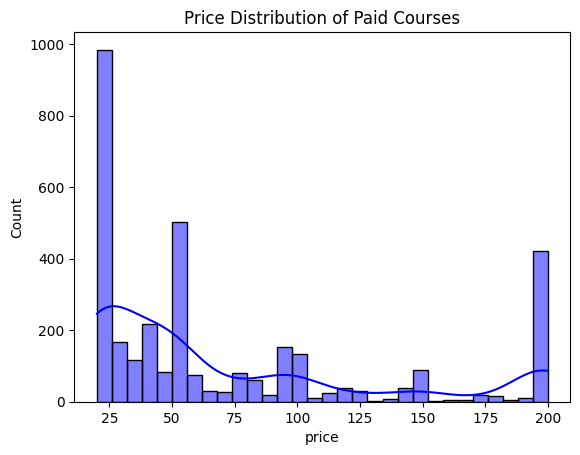

In [27]:
paid_courses = df[df['is_paid'] == True]
sns.histplot(paid_courses['price'], bins=30, kde=True, color='blue')
plt.title("Price Distribution of Paid Courses")
plt.show()

#### 4.4 Most Popular Courses

                                           course_title  num_subscribers
2827               Learn HTML5 Programming From Scratch           268923
3032                     Coding for Entrepreneurs Basic           161029
3230                         The Web Developer Bootcamp           121584
2783  Build Your First Website in 1 Week with HTML5 ...           120291
3232              The Complete Web Developer Course 2.0           114512
1896              Free Beginner Electric Guitar Lessons           101154
2589  Web Design for Web Developers: Build Beautiful...            98867
2619             Learn Javascript & JQuery From Scratch            84897
3289  Practical PHP: Master the Basics and Code Dyna...            83737
3247          JavaScript: Understanding the Weird Parts            79612


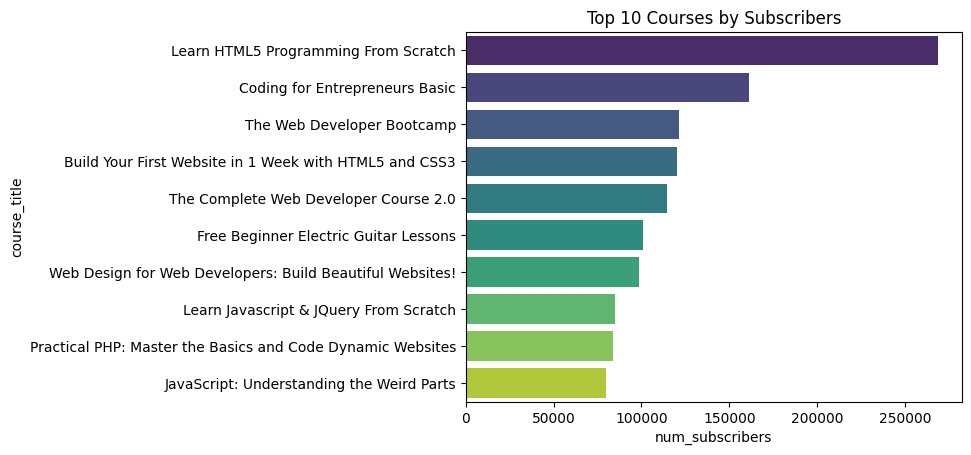

In [28]:
top_courses = df.nlargest(10, 'num_subscribers')[['course_title', 'num_subscribers']]
print(top_courses)

sns.barplot(data=top_courses, y='course_title', x='num_subscribers', palette='viridis', hue='course_title', legend=False)
plt.title("Top 10 Courses by Subscribers")
plt.show()

#### 4.5 Reviews and Subscribers Relationship

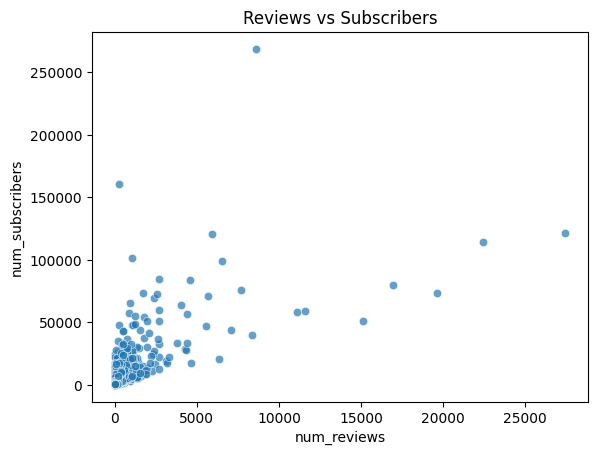

In [30]:
sns.scatterplot(data=df, x='num_reviews', y='num_subscribers', alpha=0.7)
plt.title("Reviews vs Subscribers")
plt.show()

#### 4.6 Content Duration by Level

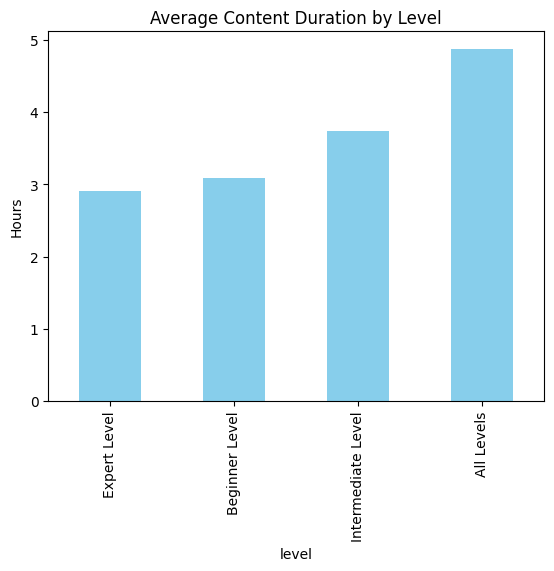

In [32]:
avg_duration = df.groupby('level')['content_duration'].mean().sort_values()
avg_duration.plot(kind='bar', color='skyblue')
plt.title("Average Content Duration by Level")
plt.ylabel("Hours")
plt.show()

#### 4.7 Monthly Course Releases

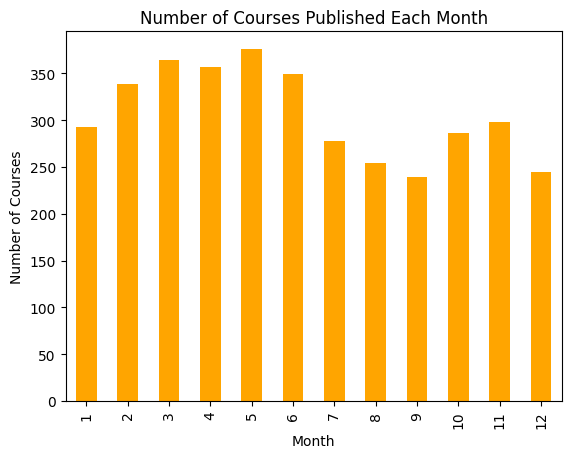

In [36]:
df['month'] = df['published_timestamp'].dt.month
monthly_courses = df['month'].value_counts().sort_index()
monthly_courses.plot(kind='bar', color='orange')
plt.title("Number of Courses Published Each Month")
plt.xlabel("Month")
plt.ylabel("Number of Courses")
plt.show()

#### 4.8 Top Subjects by Subscribers

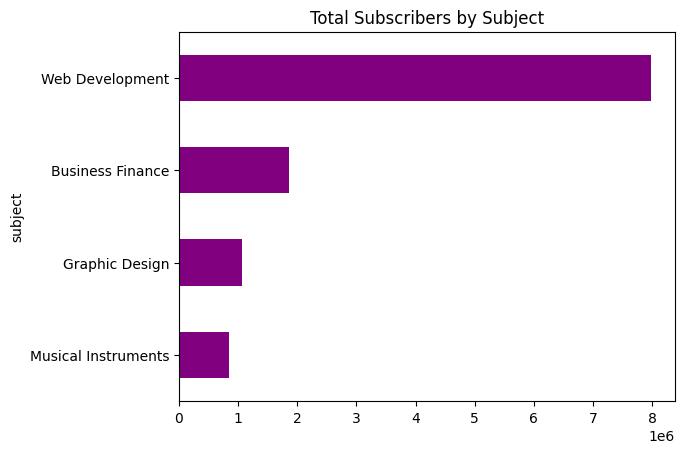

In [38]:
subject_subscribers = df.groupby('subject')['num_subscribers'].sum().sort_values()
subject_subscribers.plot(kind='barh', color='purple')
plt.title("Total Subscribers by Subject")
plt.show()

#### 4.9 Lectures vs Duration

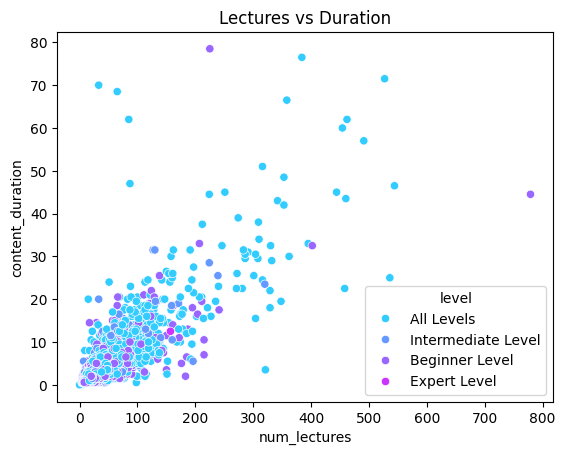

In [40]:
sns.scatterplot(data=df, x='num_lectures', y='content_duration', hue='level', palette='cool')
plt.title("Lectures vs Duration")
plt.show()